In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

data_dir = "C:/deep_learning/brain_tumor_dataset"
print(os.listdir(data_dir))


for dirname,_,filenames in os.walk("C:/deep_learning/brain_tumor_dataset"):
    for filename in filenames:
        print(os.path.join(filename,dirname))



['no', 'yes']
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tumor_dataset\no
C:/deep_learning/brain_tum

In [2]:
labels = ['no', 'yes']


image_size = 150

data= []

X = []
y = []
for i in labels:
    folderPath = os.path.join("C:/deep_learning/brain_tumor_dataset",i)
    class_num = labels.index(i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(image_size,image_size))
        X.append(img)
        y.append(class_num)


100%|██████████████████████████████████████████████████████████████████████████████| 155/155 [00:00<00:00, 1150.47it/s]


In [3]:
X = np.array(X).astype("float32")
y = np.array(y)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.10,random_state=1)

X_train = X_train.reshape((227,150,150,1)) / 255
X_test = X_test.reshape((26,150,150,1)) / 255


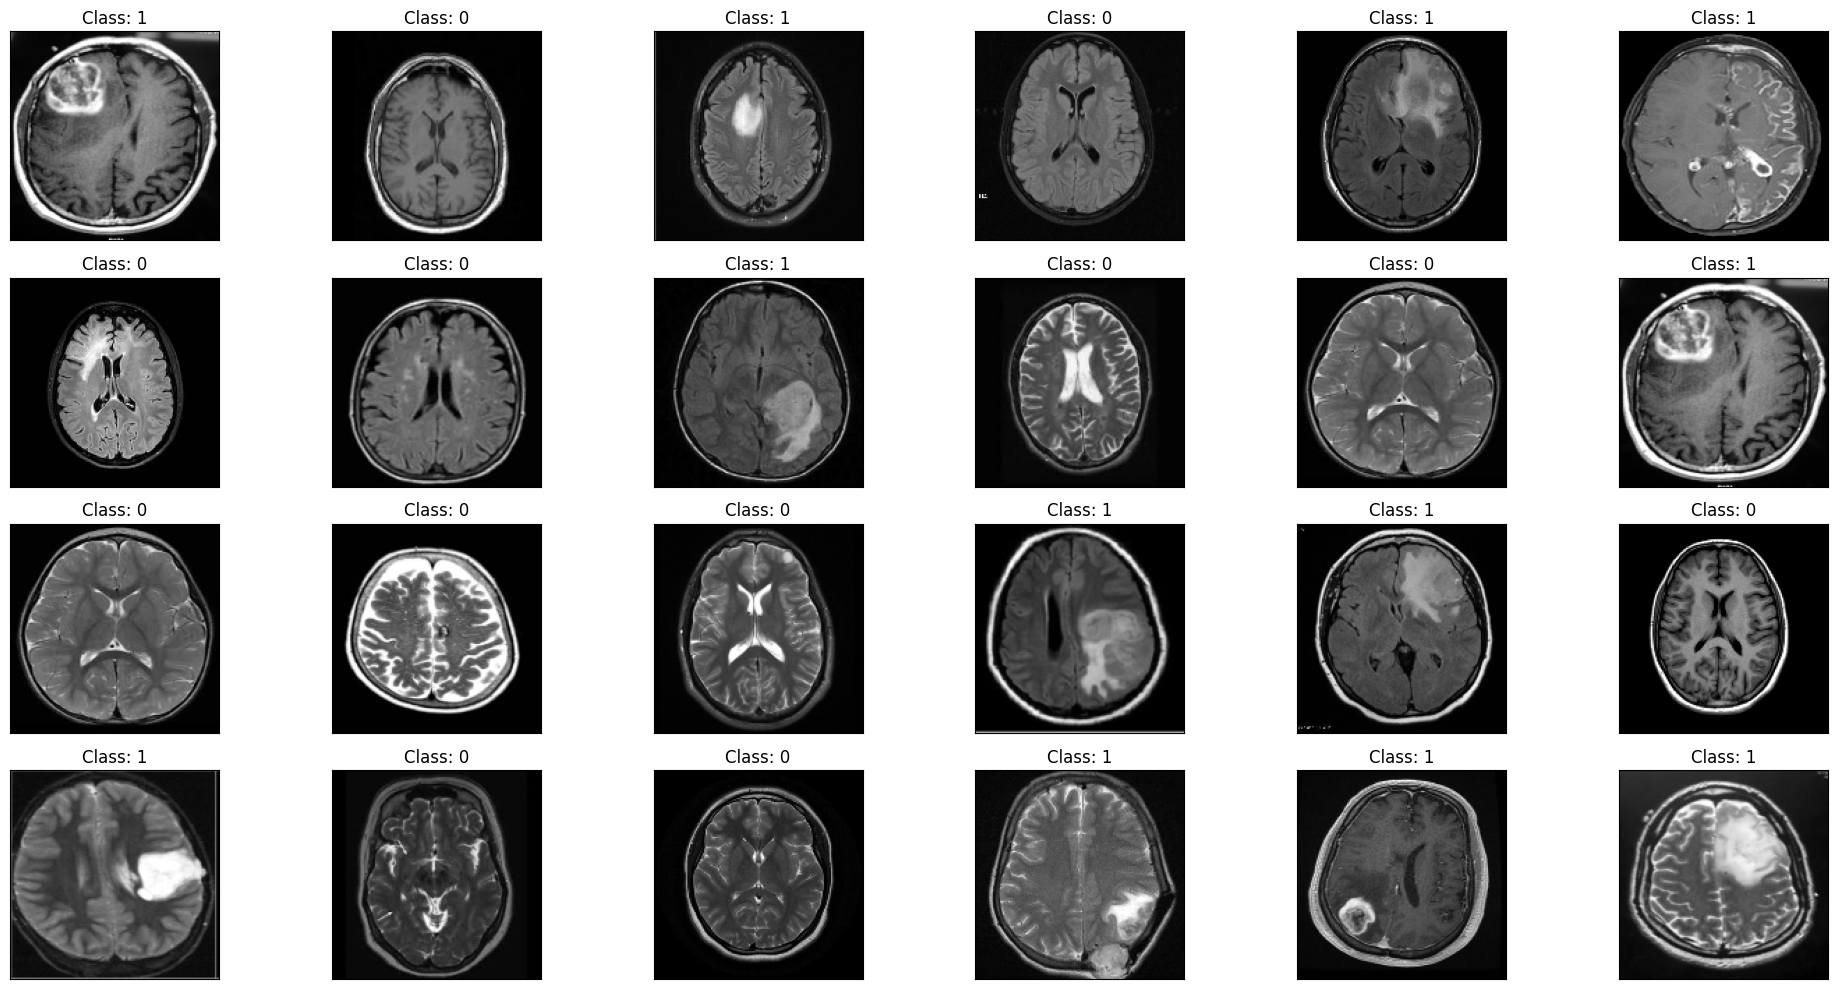

In [4]:
indices = np.random.choice(np.arange(len(X_train)),24,replace=False)
fig, axes = plt.subplots(4,6,figsize=(20,10))

for ax, idx in zip(axes.ravel(),indices):
    ax.imshow(X_train[idx].reshape(image_size,image_size),cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Class: {}'.format(y_train[idx]))

plt.tight_layout()
plt.show()


In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

GENERATOR = ImageDataGenerator(
    rescale = 1./255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
    rotation_range=40
)

GENERATOR.fit(X_train)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten

CNN = Sequential()
CNN.add(Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(150,150,1)))
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Conv2D(filters=128,activation='relu',kernel_size=(3,3)))
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Flatten())
CNN.add(Dropout(0.4))


CNN.add(Dense(512,activation='relu'))
CNN.add(Dense(1,activation='sigmoid'))
CNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = CNN.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.1)
loss,accuracy = CNN.evaluate(X_test,y_test)
pred = CNN.predict(X_test)
print("testing loss: ",loss)
print("testing accuracy:",accuracy)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - accuracy: 0.5800 - loss: 1.2754 - val_accuracy: 0.9130 - val_loss: 0.6124
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.7591 - loss: 0.6075 - val_accuracy: 0.8696 - val_loss: 0.2991
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.7346 - loss: 0.6002 - val_accuracy: 0.9130 - val_loss: 0.4089
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.8407 - loss: 0.4740 - val_accuracy: 0.8696 - val_loss: 0.3660
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.7740 - loss: 0.4721 - val_accuracy: 0.8696 - val_loss: 0.2896
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.8083 - loss: 0.4309 - val_accuracy: 0.8696 - val_loss: 0.2403
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.8530 - loss: 0.3758 - val_accuracy: 0.8261 - val_loss: 0.2810
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.9029 - loss: 0.2657 - val_accuracy: 0.9130 - val_loss:

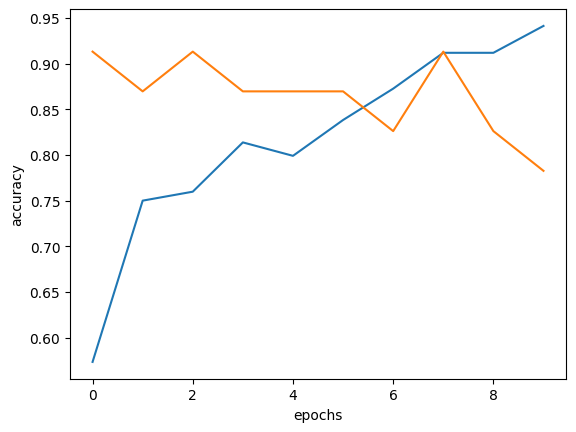

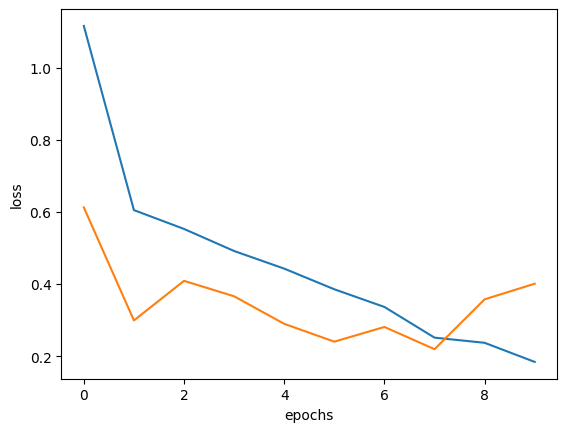

roc auc score: 90.62%


In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test,pred)
print(f"roc auc score: {roc*100:.2f}%")
